In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [21]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [22]:
df = pd.read_excel ('data/Companies.xlsx')
df.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.000,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.000,2012.000
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.000,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.000,2015.000
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.000,"Cape Town, South Africa",NaN,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.000,NaN
3,Zola Electric,ZOLA Electric (formerly Off Grid Electric) is ...,Active,2011.000,"Arusha, Tanzania",NaN,Tanzania,Tanzania,Tanzania,NaN,NaN,NaN,NaN,"GE Ventures, Helios Investment Partners, Omidy...",NaN,NaN,2018-07-26 00:00:00,Debt Financing,20000000,Series D,55000000,"Erica Mackey, Joshua Pierce, Xavier Helgesen",1,Energy & Environment Resources,"Electrical Distribution, Energy, Renewable Ene...",B2B/B2C,-,1001-5000,http://offgrid-electric.com/,https://www.linkedin.com/company/zolaelectric/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d.light,d.light is a global leader in delivering affor...,Active,2007.000,"Nairobi, Kenya",NaN,Kenya,Kenya,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,41000000,Debt Financing,50000000,"Jacob Okoth, Adrian Bock",NaN,Energy & Environment Resources,"Energy, Renewable Energy, Solar",NaN,NaN,201-500,http://www.dlight.com,https://www.linkedin.com/company/d-light-desig...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [23]:
df.shape

(3084, 118)

##### Data cleaning

In [24]:
df.replace("?", np.nan, inplace = True)
#df.head(5)

In [25]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(3084, 118)
##################### Types #####################
1_Company_name                   object
2_Company_description            object
3_Status                         object
4_Year_founded                  float64
5_Headquarters                   object
                                 ...   
Unnamed: 113                    float64
Unnamed: 114                    float64
Unnamed: 115                    float64
Average time of rounds(days)    float64
Year of recieving Series A      float64
Length: 118, dtype: object
##################### Head #####################
   1_Company_name                              2_Company_description  3_Status  4_Year_founded  \
0     Jumia Group  Jumia is connecting consumers and businesses a...    Active        2012.000   
1          Andela  Andela invests in Africa’s most talented softw...    Active        2014.000   
2        Takealot  takealot.com is one of SA's largest online ret...  Acquired

In [26]:
cols = df.columns

In [27]:
for cat_col in cols:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

1_Company_name: 3084 uniqueness variable
2_Company_description: 2829 uniqueness variable
3_Status: 5 uniqueness variable
4_Year_founded: 37 uniqueness variable
5_Headquarters: 423 uniqueness variable
6_Other_offices: 54 uniqueness variable
7.1_Country HQ: 58 uniqueness variable
7.2_Assigned_Country (Africa): 33 uniqueness variable
8_Countries_of_operation_(Business Model/Market): 147 uniqueness variable
9_Country_Parent Incorporation: 15 uniqueness variable
10_Total_Venture_Funding (Disclosed): 9 uniqueness variable
10.1_Funding Rounds (Named): 3 uniqueness variable
10.2_Number of Venture Funding rounds (#): 4 uniqueness variable
11_Investors: 157 uniqueness variable
12_Company_Valuation: 0 uniqueness variable
13_Company_Valuation_Date: 0 uniqueness variable
14_Last_funding_round_raised_date: 107 uniqueness variable
15_Last_funding_round_raised_type: 43 uniqueness variable
16_Last funding round raised amount: 198 uniqueness variable
17_Largest_round: 30 uniqueness variable
18_Amount: 1

In [28]:
#listing all columns
my_list = df.columns.values.tolist()

In [29]:
my_list

['1_Company_name',
 '2_Company_description',
 '3_Status',
 '4_Year_founded',
 '5_Headquarters',
 '6_Other_offices',
 '7.1_Country HQ',
 '7.2_Assigned_Country (Africa)',
 '8_Countries_of_operation_(Business Model/Market)',
 '9_Country_Parent Incorporation',
 '10_Total_Venture_Funding (Disclosed)',
 '10.1_Funding Rounds (Named)',
 '10.2_Number of Venture Funding rounds (#)',
 '11_Investors',
 '12_Company_Valuation',
 '13_Company_Valuation_Date',
 '14_Last_funding_round_raised_date',
 '15_Last_funding_round_raised_type',
 '16_Last funding round raised amount',
 '17_Largest_round',
 '18_Amount',
 '19_Founders',
 '20_Female_Co-Founder (Yes = 1; No  = 0)',
 '21_Main_sector',
 '22_Categories',
 '23_Business_Model',
 '24_Accelerators_Attended',
 '25_Number_of_employees',
 '26_Website',
 '27_Linkedin',
 '28_Twitter',
 '29_Facebook',
 'Companies Information, Level of Completeness',
 'Duplication',
 'Companies with a Deal Check',
 'Main Sector / Industry Check',
 'DA Acquired or Exited or Dead',


In [30]:
df = df.drop(['Total Number of Funding Rounds','Total Number of Venture Funding Rounds',
 'Total Funding todate (disclosed)','Total Venture funding todate (disclosed)','Acquired',
 '1. Grant','2. Seed', '3. Early Venture','4. Late Venture', '5. Debt Financing','6.Private Equity','7. Offerings',
 '8. Exits',2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 'Investors',
 'Unnamed: 66',
 'Unnamed: 67',
 'Unnamed: 68',
 'Unnamed: 69',
 'Unnamed: 70',
 'Unnamed: 71',
 'Unnamed: 72',
 'Unnamed: 73',
 'Unnamed: 74',
 'Unnamed: 75',
 'Unnamed: 76',
 'Unnamed: 77',
 'Unnamed: 78',
 'Unnamed: 79',
 'Unnamed: 80',
 'Duplication.1',
 'Unnamed: 82',
 'Unnamed: 83',
 'Unnamed: 84',
 'Unnamed: 85',
 'Unnamed: 86',
 'Unnamed: 87',
 'Unnamed: 88',
 'Unnamed: 89',
 'Unnamed: 90',
 'Unnamed: 91',
 'Unnamed: 92',
 'Unnamed: 93',
 'Unnamed: 94',
 'Unnamed: 95',
 'Unnamed: 96',
 'Unnamed: 97',
 'Unnamed: 98',
 'Unnamed: 99',
 'Unnamed: 100',
 'Unnamed: 101',
 'Unnamed: 102',
 'Unnamed: 103',
 'Unnamed: 104',
 'Unnamed: 105',
 'Unnamed: 106',
 'Unnamed: 107',
 'Unnamed: 108',
 'Unnamed: 109',
 'Unnamed: 110',
 'Unnamed: 111',
 'Unnamed: 112',
 'Unnamed: 113',
 'Unnamed: 114',
 'Unnamed: 115',
 'Average time of rounds(days)',
 'Year of recieving Series A '], axis=1)

In [31]:
df.columns

Index(['1_Company_name', '2_Company_description', '3_Status', '4_Year_founded', '5_Headquarters',
       '6_Other_offices', '7.1_Country HQ', '7.2_Assigned_Country (Africa)',
       '8_Countries_of_operation_(Business Model/Market)', '9_Country_Parent Incorporation',
       '10_Total_Venture_Funding (Disclosed)', '10.1_Funding Rounds (Named)',
       '10.2_Number of Venture Funding rounds (#)', '11_Investors', '12_Company_Valuation',
       '13_Company_Valuation_Date', '14_Last_funding_round_raised_date',
       '15_Last_funding_round_raised_type', '16_Last funding round raised amount',
       '17_Largest_round', '18_Amount', '19_Founders', '20_Female_Co-Founder (Yes = 1; No  = 0)',
       '21_Main_sector', '22_Categories', '23_Business_Model', '24_Accelerators_Attended',
       '25_Number_of_employees', '26_Website', '27_Linkedin', '28_Twitter', '29_Facebook',
       'Companies Information, Level of Completeness', 'Duplication',
       'Companies with a Deal Check', 'Main Sector / Ind

In [32]:
df.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified"
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.000,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.710,NaN,Jumia Group,1.000,Jumia Group,0.000,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.000,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.871,NaN,Andela,1.000,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.000,"Cape Town, South Africa",NaN,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677,NaN,Takealot,1.000,Takealot,0.000,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth
3,Zola Electric,ZOLA Electric (formerly Off Grid Electric) is ...,Active,2011.000,"Arusha, Tanzania",NaN,Tanzania,Tanzania,Tanzania,NaN,NaN,NaN,NaN,"GE Ventures, Helios Investment Partners, Omidy...",NaN,NaN,2018-07-26 00:00:00,Debt Financing,20000000,Series D,55000000,"Erica Mackey, Joshua Pierce, Xavier Helgesen",1,Energy & Environment Resources,"Electrical Distribution, Energy, Renewable Ene...",B2B/B2C,-,1001-5000,http://offgrid-electric.com/,https://www.linkedin.com/company/zolaelectric/,https://twitter.com/offgride,https://www.facebook.com/zolaelectric,0.839,NaN,Zola Electric,1.000,NaN,0.000,Energy & Resources,5. Debt Financing,4. Late Venture,Growth
4,d.light,d.light is a global leader in delivering affor...,Active,2007.000,"Nairobi, Kenya",NaN,Kenya,Kenya,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,41000000,Debt Financing,50000000,"Jacob Okoth, Adrian Bock",NaN,Energy & Environment Resources,"Energy, Renewable Energy, Solar",NaN,NaN,201-500,http://www.dlight.com,https://www.linkedin.com/company/d-light-desig...

In [33]:
df['1_Company_name'].isna().sum()

0

In [34]:
df['1_Company_name'].value_counts()

Jumia Group           1
KunaJam               1
Brave Venture Labs    1
Brighter Monday       1
BookNow               1
                     ..
Haltons Pharmacy      1
Hamwe                 1
Gricd Frij            1
Hamwe EA              1
Maungo Craft          1
Name: 1_Company_name, Length: 3084, dtype: int64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

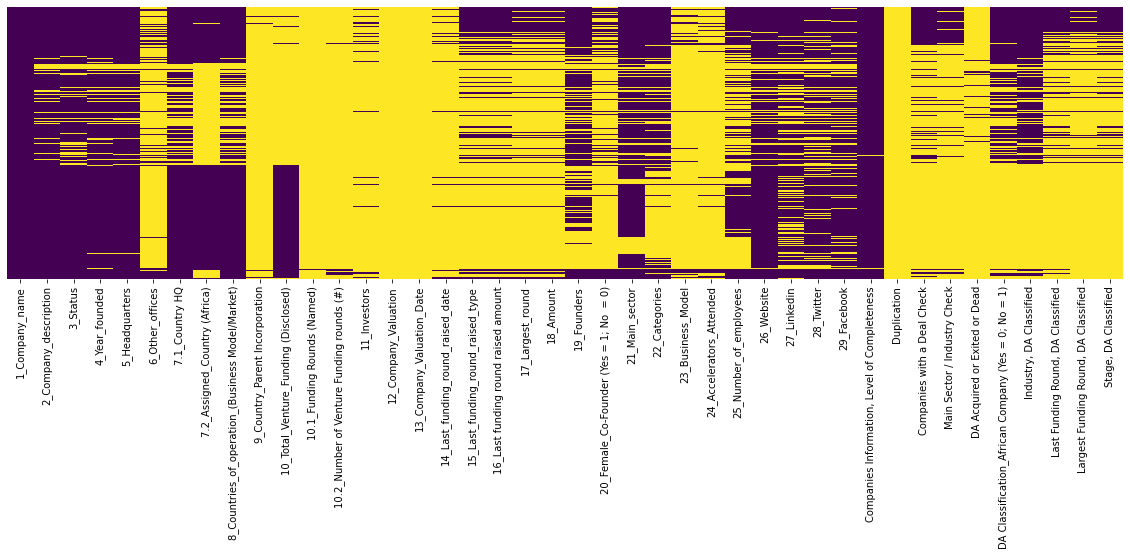

In [35]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [39]:
# let_see = df.groupby('3_Status')['1_Company_name'].value_counts()

In [41]:
# let_see

In [42]:
# print (df.groupby(['7.1_Country HQ', '1_Company_name']).size())

In [43]:
company_counts_status = df.groupby("3_Status").size()

In [44]:
company_counts_status

3_Status
Acquired                                                                                     47
Active                                                                                     2726
Closed                                                                                        2
Dead                                                                                          8
E-Commerce, Fitness, Health Care, Information Technology, Marketplace, Mobile, Wellness       1
dtype: int64

In [45]:
company_yr_founded = df.groupby("4_Year_founded").size()

In [46]:
company_yr_founded

4_Year_founded
1954.000      1
1961.000      1
1979.000      1
1980.000      1
1982.000      2
           ... 
2015.000    327
2016.000    418
2017.000    422
2018.000    339
2019.000     84
Length: 37, dtype: int64

In [47]:
company_yr_main_sector = df.groupby("21_Main_sector").size()

In [48]:
company_yr_main_sector

21_Main_sector
Agriculture                                 126
Automotive                                    5
Commercial & Professional Services          215
Communication Services                       20
E-Commerce & Retail                         278
                                           ... 
Utilities and Telcommunication Services       1
Utilities and Telecommunication Services      4
Wholesale                                     1
Wine and Spirits                              1
Wireless                                      3
Length: 92, dtype: int64

In [49]:
company_yr_by_country = df.groupby("7.1_Country HQ").size()

In [50]:
company_yr_by_country

7.1_Country HQ
Algeria                      1
Angola                      23
Australia                    1
Bahamas                      1
Benin                        3
                            ..
United Kingdom               9
United States               11
United States of America     5
Zambia                      14
Zimbabwe                    14
Length: 58, dtype: int64